# Task 1 : Iris flower clasification @ Let'sGrowMore

    ## Done By Aashish karn

Dataset Source : Kaggle

This Project can be done using following classification methods:

1. k Nearest Neighbours
2. Naive Bayes classifiers
3. Descision tree classifiers



There are 4 Features for the classification;

1. Sepal length
2. Sepal width
3. Petal length
4. Petal width

There are 3 class for the classification

1. Iris setosa
2. Iris Verginica
3. Iris Versicolor

# Step 1: Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np 
import seaborn as sns

# Step 2: Importing DataSet and visualising statistical property of DataSet

In [3]:
iris_dataset = pd.read_csv("IRIS.csv")

In [4]:
print(iris_dataset)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [5]:
iris_dataset.shape

(150, 5)

In [6]:
iris_dataset.info
iris_dataset["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [7]:
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Since standerd deviation of the features are not much deviated with respect to each other so, the data don't need to be normalized.

Scatter Plots

    sepal_length  sepal_width  petal_length  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa
20           5.4          3.4           1.7          0.2  Iris-setosa
22           4.6          3.6           1.0          0.2  Iris-setosa
24           4.8          3.4           1.9          0.2  Iris-setosa
25           5.0    

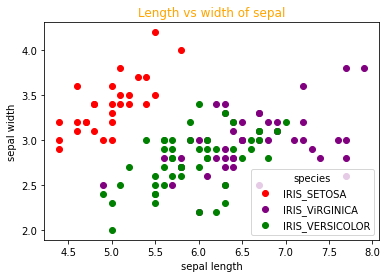

In [11]:
setosa = iris_dataset[iris_dataset.species == "Iris-setosa"]

print(setosa)

plt.scatter(x = setosa.sepal_length , y = setosa.sepal_width , c = "red", label =  'IRIS_SETOSA')

virginica = iris_dataset[iris_dataset.species == "Iris-virginica"]

plt.scatter(x = virginica.sepal_length , y = virginica.sepal_width , c = "purple", label = "IRIS_ViRGINICA")

versicolor = iris_dataset[iris_dataset.species == "Iris-versicolor"]

#plt.scatter(x = versicolor.sepal_length , y = versicolor.sepal_width , c = "green", label = "IRIS_VERSICOLOR")


plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Length vs width of sepal" , color =  "orange")
plt.legend(title = "species")

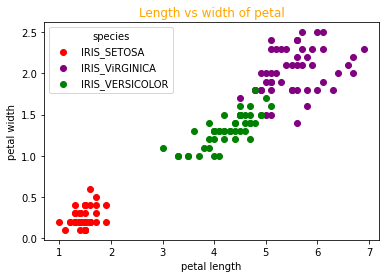

In [8]:
setosa = iris_dataset[iris_dataset.species == "Iris-setosa"]

plt.scatter(x = setosa.petal_length , y = setosa.petal_width , c = "red", label =  'IRIS_SETOSA')

virginica = iris_dataset[iris_dataset.species == "Iris-virginica"]

plt.scatter(x = virginica.petal_length , y = virginica.petal_width , c = "purple", label = "IRIS_ViRGINICA")

versicolor = iris_dataset[iris_dataset.species == "Iris-versicolor"]

plt.scatter(x = versicolor.petal_length , y = versicolor.petal_width , c = "green", label = "IRIS_VERSICOLOR")


plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("Length vs width of petal" , color =  "orange")
plt.legend(title = "species")

PairPlot


C:\Users\Ashis\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


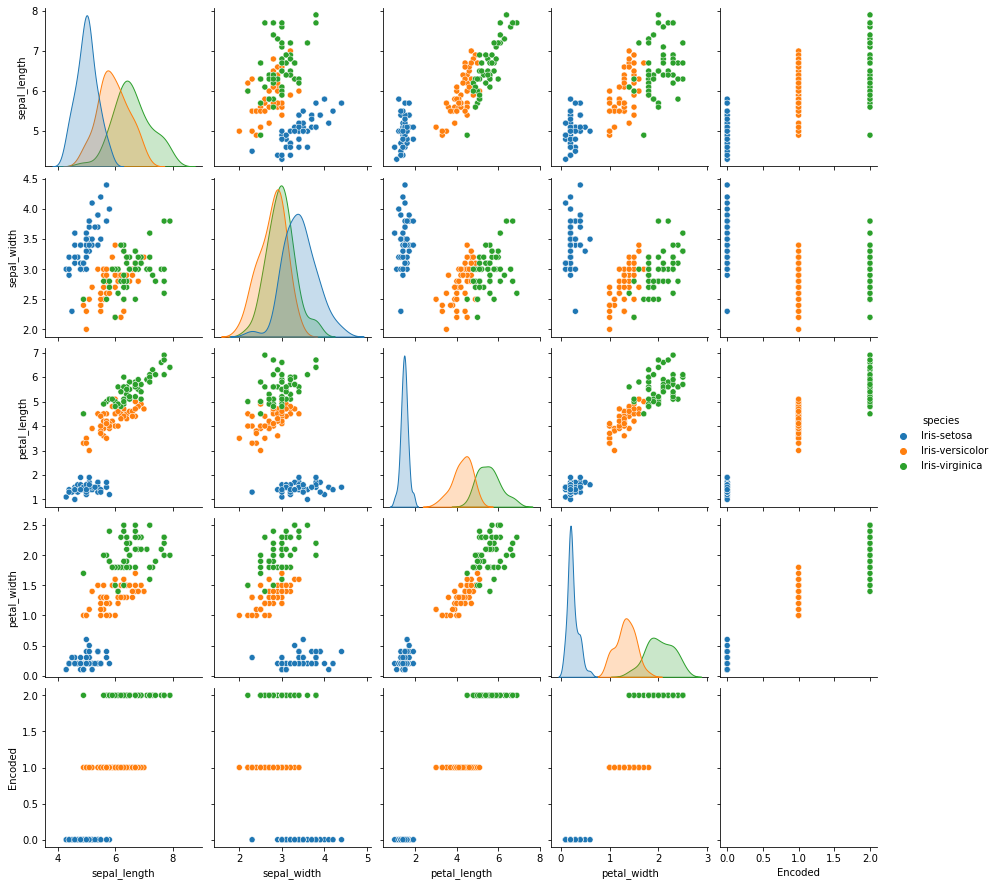

In [18]:

sns.pairplot( data = iris_dataset , hue = "species")

Note: In all those pairplot and heatmap as well as in the correlation python doesn't used the species beacuse it is the categorical data

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<AxesSubplot:>

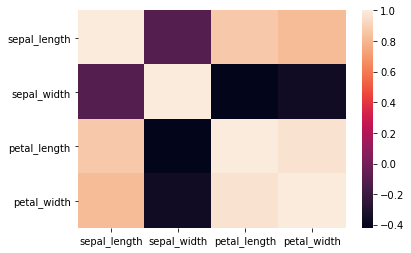

In [10]:
print(iris_dataset.corr())
sns.heatmap(iris_dataset.corr())

# Step 3: Splitting the training and testing in dataset

In [7]:
X = iris_dataset.drop("species" , axis = 1)
Y = iris_dataset["species"]

Since our Label or the class is the Categorical data so we have to use the Ecoding techniques for the transformation of
categorical data into the numeric values

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
iris_dataset["Encoded"] =  enc.fit_transform(Y.ravel())
Y = enc.fit_transform(Y.ravel())
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species,Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [10]:
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species,Encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [1]:
csvv = iris_dataset[iris_dataset["Encoded"] == 1]
csvv.to_csv("D:\\Downloads\\asis.csv")

NameError: name 'iris_dataset' is not defined

In [16]:
from sklearn.model_selection import train_test_split


x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

# Step 4 : Learning from algorithm ie model construction

Using Naive Bayes Classification

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)
print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

print(f" Accuracy score of our model is: {classifier.score(x_test , y_test) * 100} %")

[1 1 2 0 0 2 1 0 1 0 2 0 0 1 0 1 2 1 2 0 0 0 1 1 2 0 0 2 0 2 1 1 1 0 1 0 0
 0 0 2 1 2 2 2 2]
 Accuracy score of our model is: 97.77777777777777 %


Using KNearestNeighbor

In [34]:
from sklearn.neighbors import KNeighborsClassifier

N_classifier = KNeighborsClassifier(n_neighbors = 3)

N_classifier.fit(x_train,y_train)

# Predicting the Test set results
y_pred = N_classifier.predict(x_test)


print(y_pred)


print(f" Accuracy score of our model is: {classifier.score(x_test , y_test) * 100} %")


[1 1 2 0 0 2 1 0 1 0 2 0 0 1 0 1 2 1 2 0 0 0 1 1 2 0 0 2 0 2 1 1 1 0 1 0 0
 0 0 2 1 2 2 2 2]
 Accuracy score of our model is: 97.77777777777777 %


Using Descision tree classifier

In [44]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# Predicting the Test set results
y_pred = N_classifier.predict(x_test)


print(y_pred)


print(f" Accuracy score of our model is: {classifier.score(x_test , y_test) * 100} %")


0.9777777777777777
[1 1 2 0 0 2 1 0 1 0 2 0 0 1 0 1 2 1 2 0 0 0 1 1 2 0 0 2 0 2 1 1 1 0 1 0 0
 0 0 2 1 2 2 2 2]
 Accuracy score of our model is: 97.77777777777777 %


[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [32, 37, 36]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 73\nvalue = [0, 37, 36]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 5.05\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'X[1] <= 2.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3076923076923077, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.38461538461538464, 

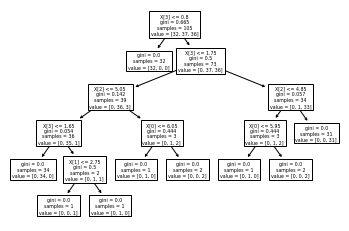

In [36]:
tree.plot_tree(clf)